# Showcase

Here is a fast visulization of our results.

Run all cells and when promted, type in an article from the english Wikipedia you wish to categorize, e.g. *Football*. If the article exists, the article is downloaded in the background (you need an Internet connection for this). 
For each of the Wikipida main topic classifcations, the probability that the article belongs to that category is then calculated and shown in a graph. 

In [5]:
import BloomClassify as BC
import LSIsimilarity
from baseline import Baseline
import os
import languageProcess as lp
import matplotlib.pyplot as plt
import numpy as np

In [6]:
LSI = LSIsimilarity.LSIsimilarity()
CL = BC.BloomClassify(prct = 40, art = 1000)

def loadModels():
    LSI.train(noOfTrainArticle=1000)
    CL.load_BL()

def checkArticle(title):
    # check if Validationfolder exists
    if not os.path.exists("../Validation"): os.mkdir("../Validation")

    # get article from wikipedia API
    Base = Baseline(folder="Validation")
    filename = "../Validation/"+title.replace(' ','')+"_raw.txt"
    with open(filename, 'w') as the_file:
        the_file.write(Base.get_dumptext([title]))

    #convert to plain text
    os.system("../wikiextractor/WikiExtractor.py "+"../Validation/"+title.replace(' ','')+"_raw.txt"+" -o"+" ../Validation/"+title.replace(' ','')+"/ --json")

    #housekeeping
    category = os.listdir("../Validation")
    if '.DS_Store' in category: category.remove('.DS_Store')

    #languageProcess
    filepath = "../Validation/"+title.replace(' ','')+"/AA/wiki_00"
    article = lp.languageProcess(filepath)
    bfarticle = article.getHighFreqWords()
    lsiarticle = article.getWords()
    
    assert (len(bfarticle)>= 1),"No article with that name"
    
    #BloomFilter
    vali_dict = {}
    numOfCheckWords = 100

    for cat in CL.BFdict.keys():
        vali_dict[cat] = sum([1 for word in bfarticle[0].most_common(numOfCheckWords) if CL.BFdict[cat].classify(word[0])])/numOfCheckWords

    #Rewrite to return LSIres and BFres
    return LSI.compare(lsiarticle), vali_dict

def plotGraph(resLSI,resBF):
    ind = np.arange(len(resLSI))    # the x locations for the groups
    width = 0.2         # the width of the bars

    fig, ax = plt.subplots(figsize=(11,5))

    p1 = ax.bar(ind-width,list(resLSI.values()),width, align='center',color='dodgerblue')
    p2 = ax.bar(ind,list(resBF.values()),width, align='center',color='darkorange')
    
    ax.set_xticks(ind + width/2)
    ax.set_xticklabels(list(resLSI.keys()),rotation='vertical')
    ax.legend((p1[0], p2[0]), ('LSI 1000','BF 1000'))
    ax.set_ylim([0,1])
    ax.set_ylabel('right assigned articles')
    ax.grid()
    plt.tight_layout()

    plt.show()

loadModels()


def main():
    title = input("Insert Article name: ")
    print(title)
    resLSI, resBF = checkArticle(title)
    plotGraph(resLSI,resBF)
    
    pass


loaded Traindata


Insert Article name: Football
Football


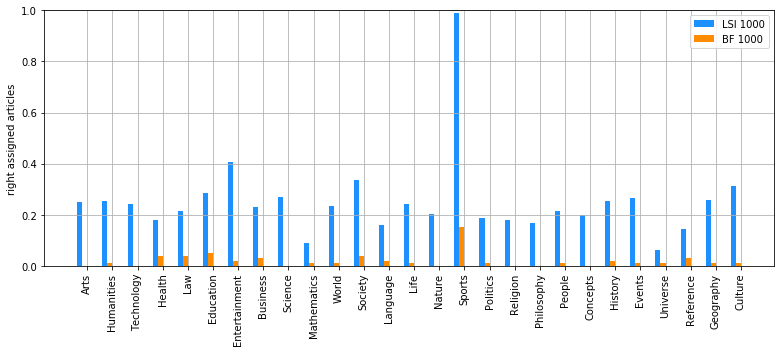

In [7]:
main()

The results shown in the graph above represent the probability that the given article is within each of the categories. The higher the difference from the highest value to the second highest value, the higher the certainty that the result is valid. Some articles are very differentiatied and clearly assignable to one single Category. E.g. *Football* or *Handball* can not clearly be assigned to any other category than Sport and therefore, the result for these articles is very clear. Other articles like *Facebook* or *Google* don't have a clear direction, as they cover multiple different topics at once. These articles could be assgined to multiple different categories and therefore, our reults are rather unclear on articles like these. 